In [1]:
# Modelo de AM para aplicação do algoritmo DecisionTreeClassifier
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Carregamento do banco de dados
arquivo = pd.read_csv('C:/UCPEL/IA-ML/EEG_Eye_State_Classification.csv')

In [3]:
# Visualização do conjunto de dados
arquivo.head(13180)

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.9000,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.8200,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.7200,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.3100,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.8200,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13175,4280.00,4007.69,4261.03,4107.69,4344.10,4615.90,4083.08,4631.28,4215.38,4240.00,4200.00,4278.97,4597.9500,4339.49,0
13176,4271.79,4006.67,4254.36,4109.74,4349.23,4621.03,4090.77,4629.23,4206.67,4236.92,4194.36,4270.26,4593.3300,4333.33,0
13177,4270.77,4011.79,4250.26,4116.92,4347.69,4624.10,4092.82,4628.21,4206.67,4228.72,4189.23,4262.05,4586.6700,4329.74,0
13178,4276.92,4013.85,4256.41,4115.90,4344.62,4618.97,4088.21,4628.21,4213.33,4226.67,4190.77,4264.10,4584.6200,4335.38,0


In [4]:
# Visualização do tamanho do banco de dados
arquivo.shape

(14980, 15)

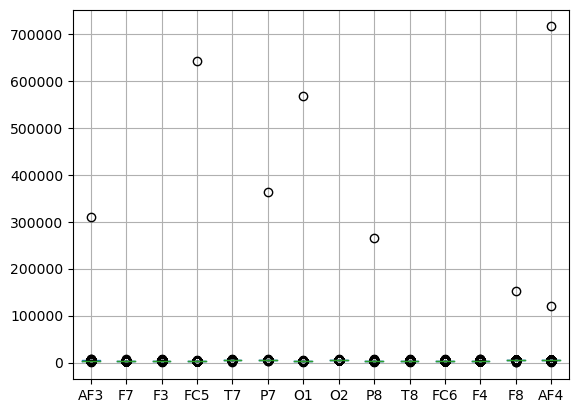

In [5]:
# Boxplot do Matplotlib
arquivo.boxplot(column=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'])
plt.show()

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AF3'>

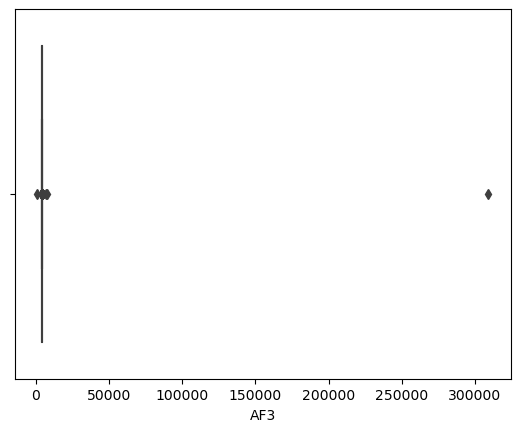

In [6]:
# Boxplot da biblioteca Seaborn (Atributo AF3)
sns.boxplot(arquivo['AF3'])

In [7]:
# Posição dos Outliers (Atributo AF3)
print(np.where(arquivo['AF3']<3940))
print(np.where(arquivo['AF3']>4650))

(array([13179], dtype=int64),)
(array([  898, 10386, 11509], dtype=int64),)


In [8]:
# Método IQR para tratamento de Outliers (AF3)
Q1 = np.percentile(arquivo['AF3'], 25, interpolation = 'midpoint')
Q3 = np.percentile(arquivo['AF3'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", arquivo.shape)

Old Shape:  (14980, 15)


In [9]:
# Upper bound
upper = np.where(arquivo['AF3'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(arquivo['AF3'] <= (Q1-1.5*IQR))

In [10]:
# Removendo outliers
arquivo.drop(upper[0], inplace=True)
arquivo.drop(lower[0], inplace=True)

print("New Shape: ", arquivo.shape)

New Shape:  (13495, 15)


C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AF3'>

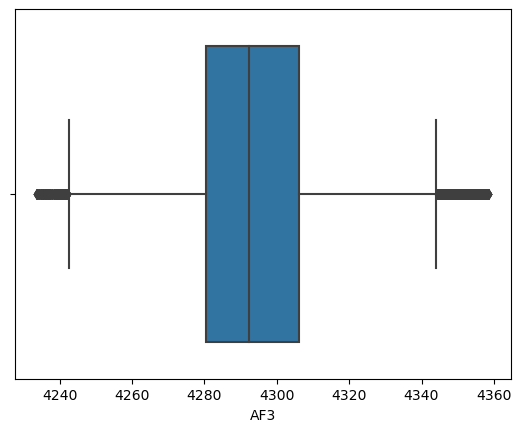

In [11]:
# Boxplot da biblioteca Seaborn (Atributo AF3)
sns.boxplot(arquivo['AF3'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='F7'>

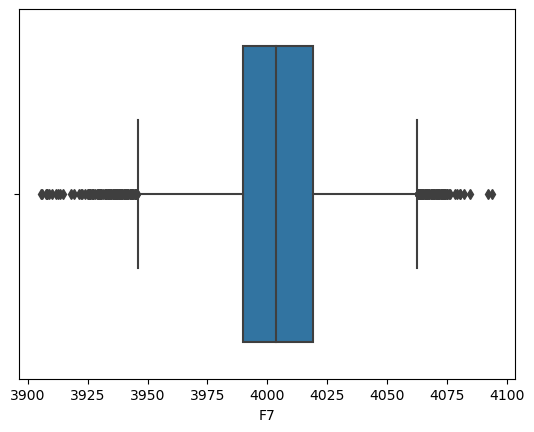

In [12]:
# Boxplot da biblioteca Seaborn (Atributo F7)
sns.boxplot(arquivo['F7'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FC5'>

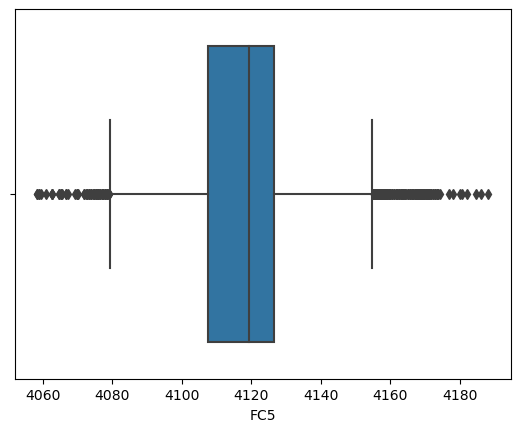

In [13]:
# Boxplot da biblioteca Seaborn (Atributo FC5)
sns.boxplot(arquivo['FC5'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='F3'>

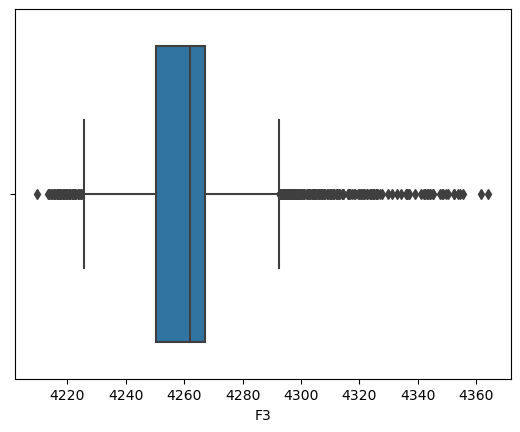

In [14]:
# Boxplot da biblioteca Seaborn (Atributo F3)
sns.boxplot(arquivo['F3'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='T7'>

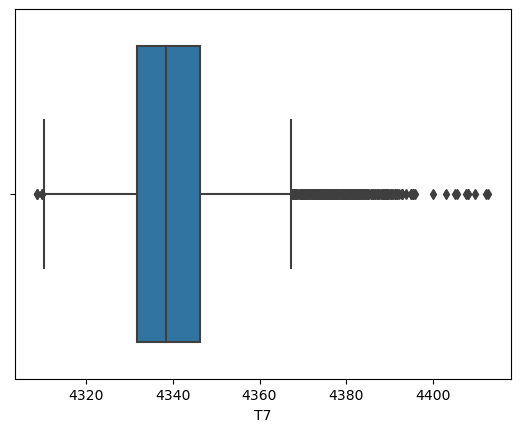

In [15]:
# Boxplot da biblioteca Seaborn (Atributo T7)
sns.boxplot(arquivo['T7'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P7'>

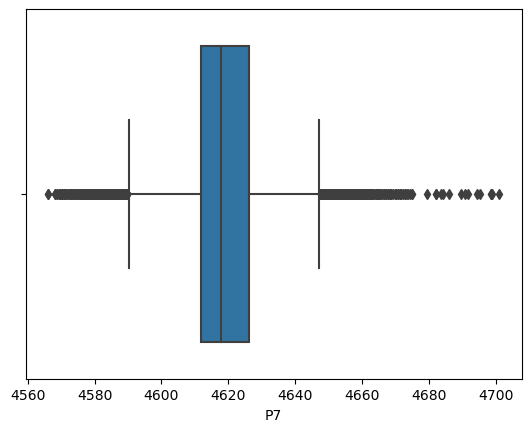

In [16]:
# Boxplot da biblioteca Seaborn (Atributo P7)
sns.boxplot(arquivo['P7'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='O1'>

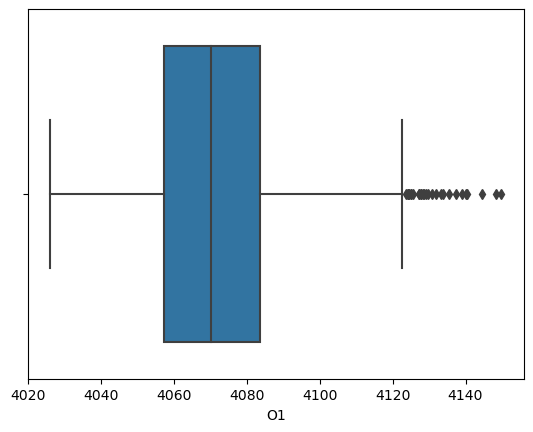

In [17]:
# Boxplot da biblioteca Seaborn (Atributo O1)
sns.boxplot(arquivo['O1'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='O2'>

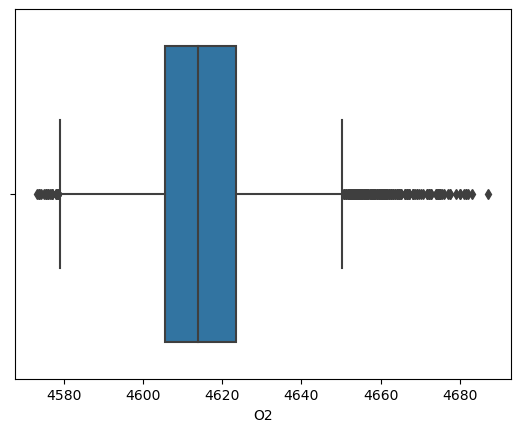

In [18]:
# Boxplot da biblioteca Seaborn (Atributo O2)
sns.boxplot(arquivo['O2'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P8'>

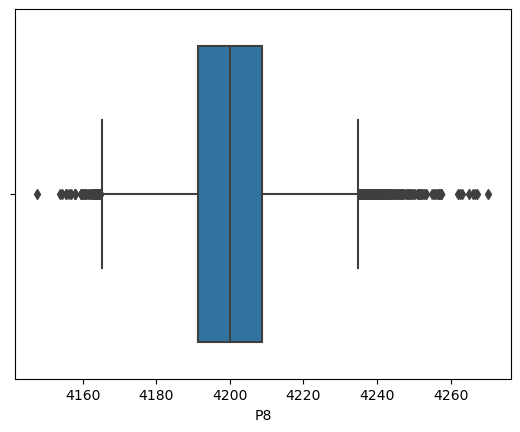

In [19]:
# Boxplot da biblioteca Seaborn (Atributo P8)
sns.boxplot(arquivo['P8'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='T8'>

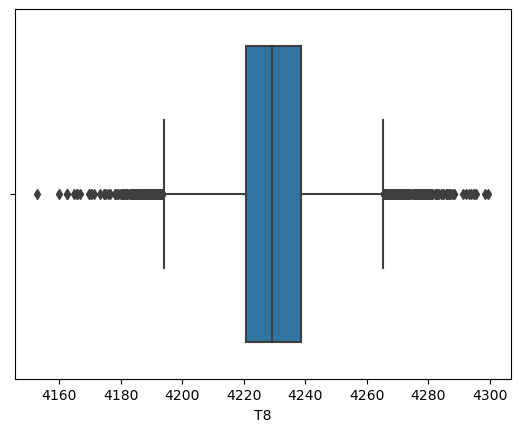

In [20]:
# Boxplot da biblioteca Seaborn (Atributo T8)
sns.boxplot(arquivo['T8'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FC6'>

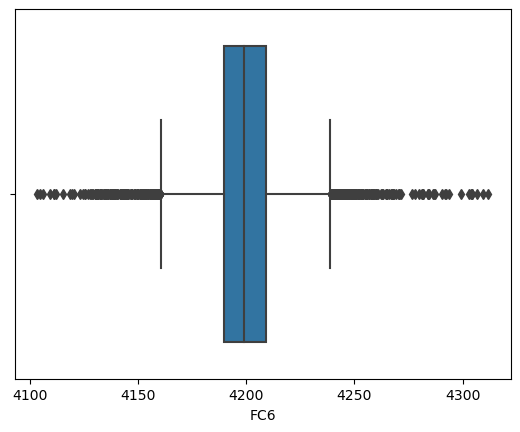

In [21]:
# Boxplot da biblioteca Seaborn (Atributo FC6)
sns.boxplot(arquivo['FC6'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='F4'>

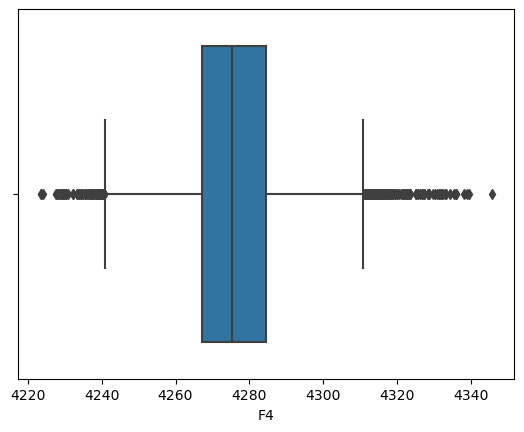

In [22]:
# Boxplot da biblioteca Seaborn (Atributo F4)
sns.boxplot(arquivo['F4'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='F8'>

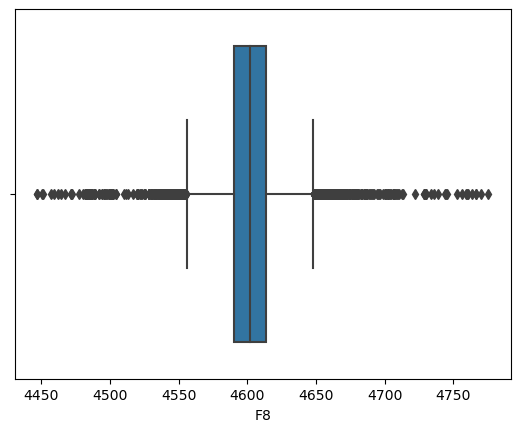

In [23]:
# Boxplot da biblioteca Seaborn (Atributo F8)
sns.boxplot(arquivo['F8'])

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AF4'>

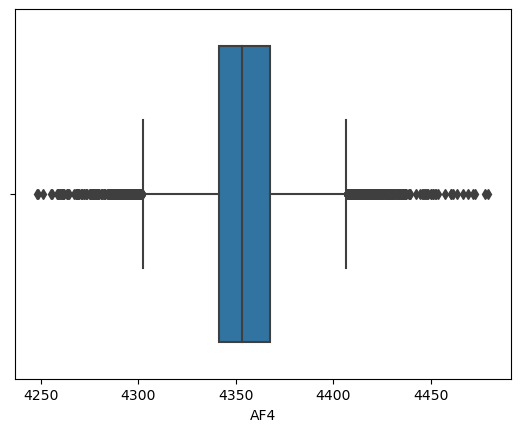

In [24]:
# Boxplot da biblioteca Seaborn (Atributo AF4)
sns.boxplot(arquivo['AF4'])

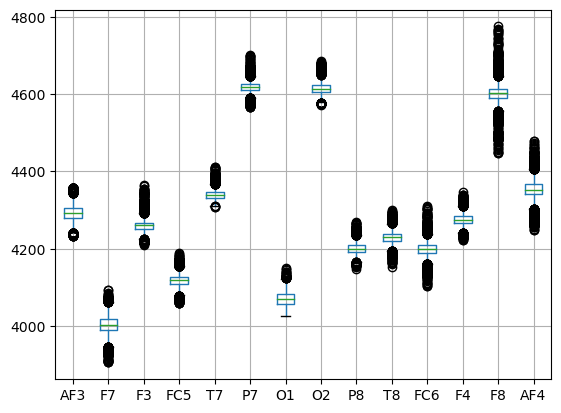

In [25]:
# Boxplot do Matplotlib
arquivo.boxplot(column=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'])
plt.show()

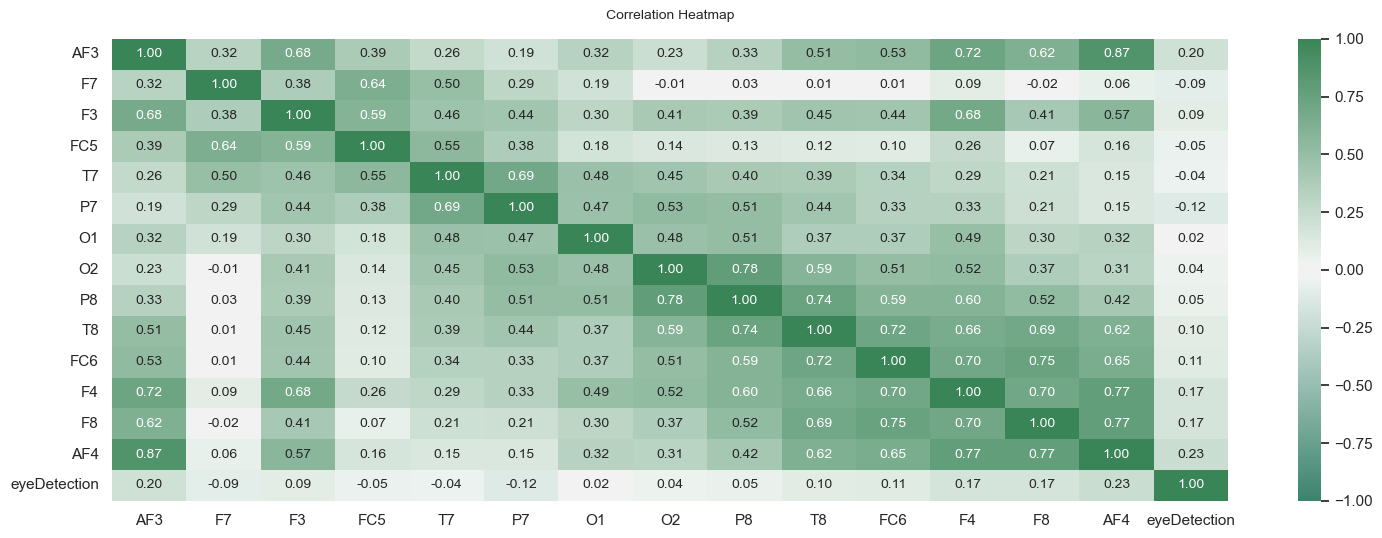

In [26]:
# Matriz de correlação (Biblioteca Seaborn), com os dados de correlação nas células
sns.set(font_scale=1)
plt.figure (figsize = (18, 6))
cmap = sns.diverging_palette(160, 140, sep=10, as_cmap=True)
heatmap = sns.heatmap(arquivo.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1,fmt=".2f", annot_kws={'size':10})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=14);

In [27]:
# Separação das variáveis preditoras (características) e da variável-alvo (desfecho)
y = arquivo['eyeDetection']
x = arquivo.drop('eyeDetection', axis = 1)

In [28]:
# Criação dos conjuntos de treino e teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [29]:
# Quantidade de dados para treino
x_treino.shape

(9446, 14)

In [30]:
# Quantidade de dados para teste
x_teste.shape

(4049, 14)

In [31]:
# Criação do modelo
for i in range(100):
    modelo = DecisionTreeClassifier()
    modelo.fit(x_treino, y_treino)
    
    #Imprimindo resultados
    resultado = modelo.score(x_teste, y_teste)
    print("Acurácia", resultado)

Acurácia 0.832304272659916
Acurácia 0.8332921709063966
Acurácia 0.8347740182761175
Acurácia 0.8340330945912571
Acurácia 0.835514941960978
Acurácia 0.8332921709063966
Acurácia 0.8271178068658929
Acurácia 0.8310693998518153
Acurácia 0.8276117559891332
Acurácia 0.8330451963447765
Acurácia 0.830575450728575
Acurácia 0.8389725858236602
Acurácia 0.835514941960978
Acurácia 0.8310693998518153
Acurácia 0.8335391454680168
Acurácia 0.8345270437144974
Acurácia 0.8327982217831563
Acurácia 0.8315633489750556
Acurácia 0.8308224252901951
Acurácia 0.8352679673993578
Acurácia 0.8362558656458384
Acurácia 0.8350209928377377
Acurácia 0.8345270437144974
Acurácia 0.830575450728575
Acurácia 0.8295875524820944
Acurácia 0.8310693998518153
Acurácia 0.8340330945912571
Acurácia 0.8347740182761175
Acurácia 0.8357619165225981
Acurácia 0.8330451963447765
Acurácia 0.8409483823166214
Acurácia 0.8313163744134354
Acurácia 0.8372437638923191
Acurácia 0.8360088910842183
Acurácia 0.835514941960978
Acurácia 0.838231662138799

In [32]:
# Determinando a acurácia na amostra de treino
score_treino = modelo.score(x_treino, y_treino)
score_treino

1.0

In [33]:
# Realizando previsão na amostra de teste
y_previsto = modelo.predict(x_teste)
score_teste = modelo.score(x_teste, y_teste)
score_teste

0.8332921709063966

In [34]:
# Gerando Matriz de Confusão
cm = confusion_matrix(y_teste, y_previsto)
cm

array([[1882,  352],
       [ 323, 1492]], dtype=int64)

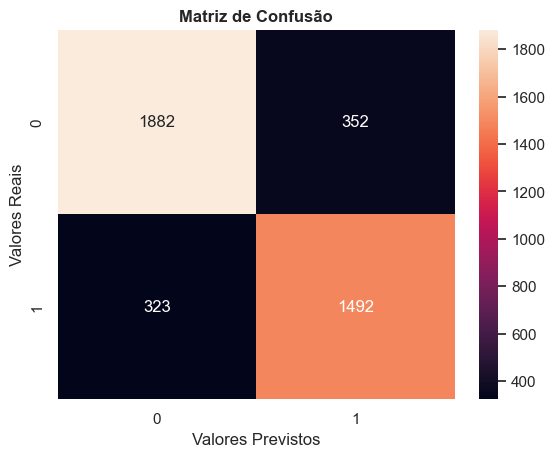

In [35]:
# Mapa de calor da Matriz de Confusão
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusão', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()